In [2]:
!conda --version

conda 4.12.0


In [3]:
!python -V

Python 3.9.12


In [4]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

/home/codespace/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/codespace/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [5]:
pd.__version__

'2.2.2'

### loading data

In [6]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
# df_jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
# df_fab = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
# df = pd.concat([df_jan, df_fab])

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


### Measuring Duration

In [8]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df['duration'] = df.duration.dt.total_seconds() /60

### Calculating Standerd Deviation

In [9]:
df.duration.mean()

15.668995167330452

In [10]:
df.duration.std()

42.59435124195458

### Drop Outliers

In [11]:
len(df[(df.duration >=1) & (df.duration <=60)]) / len(df) *100

98.1220282212598

In [12]:
df = df[(df.duration >= 1) & (df.duration <= 60)].copy()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


### Q4. One hot Encodings

In [13]:
categorical = ['PULocationID', 'DOLocationID']

In [14]:
df[categorical] = df[categorical].astype(str)


In [15]:
train_dicts = df[categorical].to_dict(orient='records')


In [16]:
from sklearn.feature_extraction import DictVectorizer

In [17]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [18]:
print("Feature matrix size", X_train.shape)

Feature matrix size (3009173, 515)


### Q5. Train a model

In [19]:
target = 'duration'
y_train = df[target].values

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_train)

print(f'Train RMSE: {mean_squared_error(y_train, y_pred, squared = False)}')

Train RMSE: 7.649261027862345


In [23]:
import joblib
joblib.dump(lr, 'lr_model.joblib')

lr = joblib.load('lr_model.joblib')

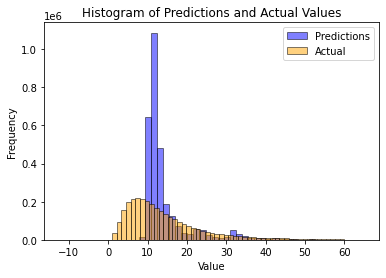

In [24]:
import matplotlib.pyplot as plt
plt.hist(y_pred, bins=50, alpha=0.5, label='Predictions', color='blue', edgecolor='black')
plt.hist(y_train, bins=50, alpha=0.5, label='Actual', color='orange', edgecolor='black')

# Add a legend
plt.legend()

# Add titles and labels
plt.title('Histogram of Predictions and Actual Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()


### Q6. Model Evaluation

In [3]:
import pandas as pd
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].astype('str')
    
    return df

/home/codespace/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/codespace/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [4]:
df_val = read_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [5]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [6]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
X_val = dv.fit_transform(val_dicts)


X_val = dv.transform(val_dicts) 
y_val = df_val.duration.values

In [7]:
import joblib
# joblib.dump(lr, 'lr_model.joblib')

lr = joblib.load('lr_model.joblib')

In [13]:
y_pred = lr.predict(X_val)

In [14]:
print(f'Val RMSE: {mean_squared_error(y_val, y_pred, squared=False)}')